In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from statsmodels.tsa.filters.hp_filter import hpfilter
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df = pd.read_csv('bitstamp_cleaned.csv')

In [4]:
df.head()

,Unix_Timestamp,DateTime,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,12/31/2011 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,12/31/2011 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,12/31/2011 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,12/31/2011 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,01/01/2012 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [6]:
df.shape

(3330541, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330541 entries, 0 to 3330540
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Unix_Timestamp     int64         
 1   DateTime           datetime64[ns]
 2   Open               float64       
 3   High               float64       
 4   Low                float64       
 5   Close              float64       
 6   Volume_(BTC)       float64       
 7   Volume_(Currency)  float64       
 8   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 228.7 MB


In [8]:
#picking one record from each day
df = df.set_index('DateTime').resample('D').last()
df = df.reset_index()

#filling up the nan values with the closest mean
meanPrice = (df.loc[1101]['Weighted_Price'] + df.loc[1105]['Weighted_Price'])/2
df['Weighted_Price'].fillna(meanPrice, inplace=True)
df['Weighted_Price'].isna().sum()
df.loc[1102:1104]


,DateTime,Unix_Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1102,2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.385
1103,2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.385
1104,2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.385


In [9]:
# Set the DateTime column (adjust the column name if necessary) as the index
df.set_index('DateTime', inplace=True)

# Resample by month, keeping only the 'first' observation (first day of month)
df_monthly_first = df.resample('M')['Weighted_Price'].first()

# Reset the index to obtain a separate column for 'date'
df_monthly_first = df_monthly_first.reset_index(name='Weighted_Price')

# Rename the 'DateTime' column to 'date' (optional)
df_monthly_first.rename(columns={'DateTime': 'date'}, inplace=True)

# Print the DataFrame with Weighted_Price for the first day of each month
print(df_monthly_first.to_string(index=False))


      date  Weighted_Price
2011-12-31        4.580000
2012-01-31        5.000000
2012-02-29        5.880000
2012-03-31        5.000000
2012-04-30        4.890000
2012-05-31        4.970000
2012-06-30        5.220000
2012-07-31        6.520000
2012-08-31        9.450000
2012-09-30        9.910000
2012-10-31       12.140000
2012-11-30       10.793242
2012-12-31       12.340000
2013-01-31       13.220000
2013-02-28       20.363143
2013-03-31       34.550000
2013-04-30      104.700000
2013-05-31      116.750000
2013-06-30      128.775040
2013-07-31       84.463240
2013-08-31       96.595885
2013-09-30      130.660000
2013-10-31      127.330000
2013-11-30      202.150000
2013-12-31      955.967850
2014-01-31      754.281543
2014-02-28      813.123713
2014-03-31      567.476321
2014-04-30      479.185103
2014-05-31      460.970000
2014-06-30      630.990000
2014-07-31      638.163101
2014-08-31      598.200000
2014-09-30      474.540048
2014-10-31      384.674310
2014-11-30      324.691247
2

## Producing a Forecast

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


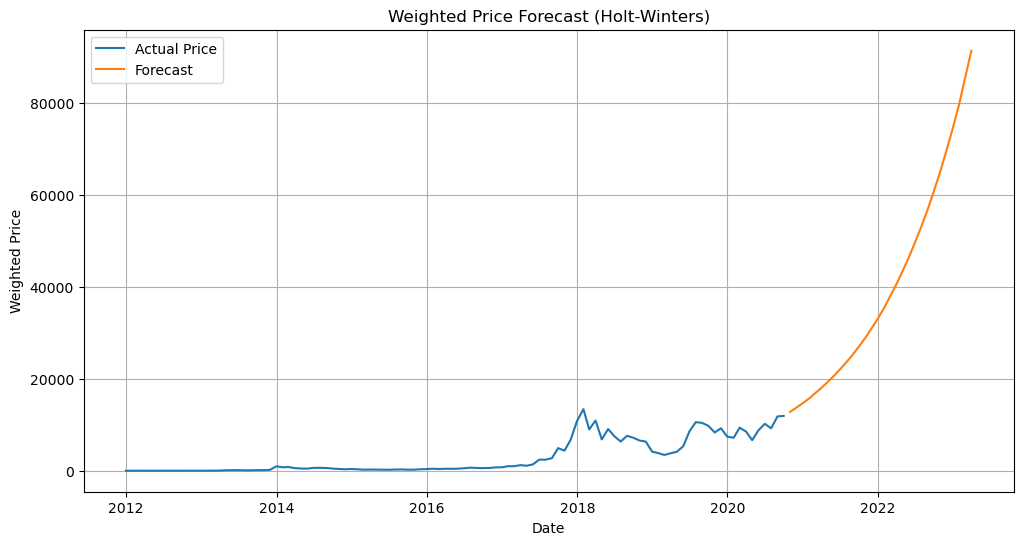

      Date     Forecast
2020-10-31 12811.612308
2020-11-30 13709.685698
2020-12-31 14670.712585
2021-01-31 15699.105910
2021-02-28 16799.587950
2021-03-31 17977.212010
2021-04-30 19237.385619
2021-05-31 20585.895368
2021-06-30 22028.933479
2021-07-31 23573.126238
2021-08-31 25225.564422
2021-09-30 26993.835862
2021-10-31 28886.060281
2021-11-30 30910.926585
2021-12-31 33077.732756
2022-01-31 35396.428550
2022-02-28 37877.661184
2022-03-31 40532.824230
2022-04-30 43374.109929
2022-05-31 46414.565180
2022-06-30 49668.151447
2022-07-31 53149.808872
2022-08-31 56875.524875
2022-09-30 60862.407569
2022-10-31 65128.764319
2022-11-30 69694.185806
2022-12-31 74579.635986
2023-01-31 79807.548357
2023-02-28 85401.928964
2023-03-31 91388.466642


In [10]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming your data is loaded in a dataframe named 'df'

# Select the relevant columns
df_2 = df_monthly_first.copy()

# Set the date as the index
df_2.set_index('date', inplace=True)

# Extract the actual price data
y = df_2['Weighted_Price']

# Define the model (trend only)
model = ExponentialSmoothing(y, trend='multiplicative', seasonal=None)

# Fit the model on the training data
model_fit = model.fit()

# Forecast for the next 5 days
forecast = model_fit.forecast(steps=30)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': forecast.index, 'Forecast': forecast.values})

# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))  # Adjust the figure size as desired
plt.plot(y, label='Actual Price')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Weighted Price')
plt.title('Weighted Price Forecast (Holt-Winters)')
plt.legend()
plt.grid(True)
plt.show()


# Print the forecast for the next 5 days
print(forecast_df.to_string(index=False))


In [11]:
df = df_monthly_first

In [12]:
df.head()

,date,Weighted_Price
0,2011-12-31,4.58
1,2012-01-31,5.00
2,2012-02-29,5.88
3,2012-03-31,5.00
4,2012-04-30,4.89


<Axes: title={'center': 'visitors Data'}>

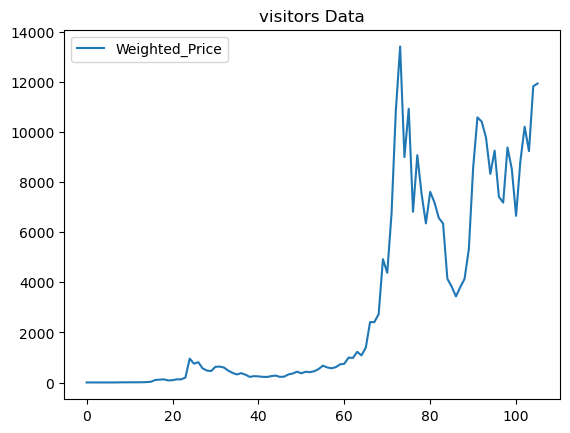

In [13]:
df[['Weighted_Price']].plot(title='visitors Data')

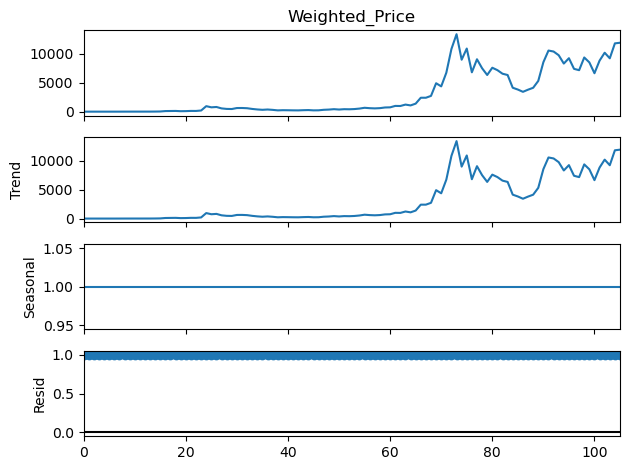

In [14]:
decompose_result = seasonal_decompose(df['Weighted_Price'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

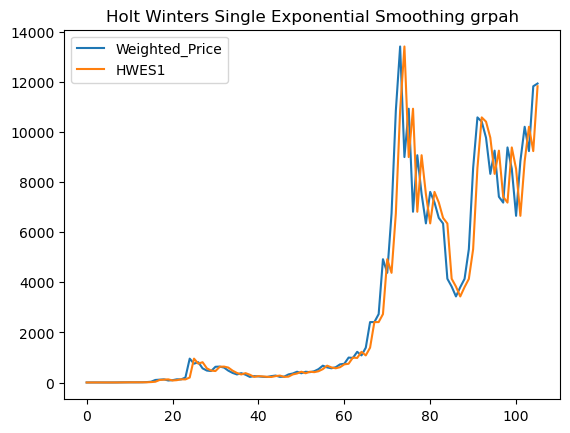

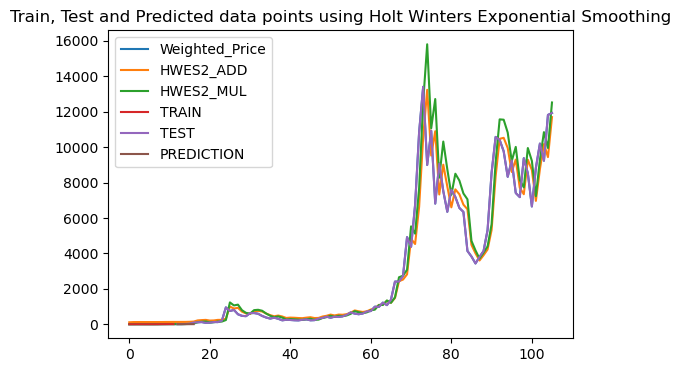

In [15]:
# Set the value of Alpha and define x as the time period
x = 12
alpha = 1/(2*x)
# Single exponential smoothing of the df data set
df['HWES1'] = SimpleExpSmoothing(df['Weighted_Price']).fit(smoothing_level=1,optimized=0.3,use_brute=True).fittedvalues      
df[['Weighted_Price','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')
df['HWES2_ADD'] = ExponentialSmoothing(df['Weighted_Price'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['Weighted_Price'],trend='mul').fit().fittedvalues
df[['Weighted_Price','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend')
# Split into train and test set
train_visitors = df[:12]
test_visitors = df[12:]
# Fit the model
fitted_model = ExponentialSmoothing(train_visitors['Weighted_Price'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(5)
train_visitors['Weighted_Price'].plot(legend=True,label='TRAIN')
test_visitors['Weighted_Price'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

In [16]:
df.head()

,date,Weighted_Price,HWES1,HWES2_ADD,HWES2_MUL
0,2011-12-31,4.58,4.58,115.787983,3.876727
1,2012-01-31,5.00,4.58,127.990977,5.241597
2,2012-02-29,5.88,5.00,129.565280,5.799597
3,2012-03-31,5.00,5.88,130.502840,6.792352
4,2012-04-30,4.89,5.00,129.791329,5.873415


In [17]:
# Assuming 'date' is your datetime column and 'Weighted_Price' is the price data
#df.set_index('date', inplace=True)  # Set date as the index
y = df['Weighted_Price']

# Experiment with alpha (level smoothing) and beta (trend smoothing) values
alpha = 1  # Starting point for alpha
beta = 0.3  # Starting point for beta

# Define the model (trend only, set gamma to 0 for no seasonality)
model = ExponentialSmoothing(y, trend='additive', seasonal=None)

# Fit the model on the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)

# Forecast for the next 5 months
forecast = model_fit.forecast(steps=5)

# Create a DataFrame for the actual data and forecast
df_plot = pd.concat([df, forecast.to_frame(name='Forecast')], join='outer')

steps = 5

# Extend the original index to include forecast dates (assuming monthly data)
#future_dates = df.index[-1] + pd.DateOffset(months=range(1, 6))  # Add 1 to exclude last date
future_dates = [df.index[-1] + pd.DateOffset(months=i) for i in range(1, steps + 1)]
df_plot = df_plot.reindex(future_dates, fill_value=np.NAN)

# Plot the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['Weighted_Price'], label='Actual Price', color='blue')
plt.plot(df_plot.index, df_plot['Forecast'], label='Forecast', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Forecast (Holt-Winters)')
plt.grid(True)
plt.show()

print("**Note:** This is a starting point for alpha and beta. Experiment with different values for potentially better results.")


/var/folders/rk/hy3_73w93s79h1h_4dsl0z5w0000gn/T/ipykernel_20698/1003525075.py:13: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)


TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'